In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from sklearn import preprocessing, model_selection
import seaborn as sns

In [2]:
df = pd.read_csv("velocity_GPS.csv", sep=";")

In [3]:
df

,Position,Mean_Q1,Mean_Q2,Mean_Q3,Mean_Q4,Mean_MT1,Mean_MT2,Mean_Game,CV_Q1,CV_Q2,...,Frac_Max_MT1,Frac_Max_MT2,Frac_Max_Game,Frac_Peak_Q1,Frac_Peak_Q2,Frac_Peak_Q3,Frac_Peak_Q4,Frac_Peak_MT1,Frac_Peak_MT2,Frac_Peak_Game
0,MO,7.789367,8.112066,6.217392,6.934285,7.950717,6.575839,7.215189,55.605161,54.073532,...,1.9091,9.9384,9.4746,1.13,1.26,NaN,1.83,1.05,8.89,1.57
1,A,7.632878,7.384194,6.489285,6.825642,7.508541,6.657464,7.064558,59.913676,67.090667,...,2.0825,8.1705,8.1687,1.06,1.22,2.17,1.82,1.11,1.75,1.92
2,DC,6.614901,6.467651,5.897360,5.145966,6.541276,5.521663,6.026885,60.116961,58.606223,...,2.0114,1.5896,1.7884,1.06,1.15,1.09,1.03,1.05,1.00,0.97
3,DC,6.701445,6.475201,6.113884,5.792851,6.588323,5.953368,6.267991,60.958518,64.499953,...,1.9839,2.3728,2.1017,0.99,1.16,1.13,1.12,1.02,1.11,1.01
4,MO,6.936161,6.677531,6.110121,5.153430,6.806846,5.631776,6.212855,64.418311,63.536830,...,1.6752,4.6280,4.3891,1.09,1.03,1.48,1.59,1.01,1.69,1.57
5,MO,6.538294,6.330699,6.588781,6.212254,6.434496,6.400518,6.417387,65.759267,64.881926,...,3.4039,5.3536,4.9534,1.39,1.25,1.64,1.11,1.40,1.72,1.68
6,MO,6.997841,6.401898,6.563122,5.981514,6.699870,6.272318,6.481311,59.669562,70.657531,...,2.0152,5.1347,5.7003,1.04,1.12,1.17,1.62,1.02,1.58,1.76
7,MO,7.219819,6.718718,6.342854,5.414612,6.969269,5.878733,6.404225,64.238186,70.668767,...,2.0810,1.9760,2.0606,1.17,1.23,1.12,1.28,1.12,1.09,1.08
8,MO,7.131039,6.060565,5.736496,5.264890,6.595821,5.500693,6.008675,58.194212,68.383528,...,1.8088,4.8646,4.7993,1.07,1.13,1.41,1.35,1.03,1.48,1.58
9,MO,7.117527,6.778572,6.236826,6.145116,6.948049,6.190971,6.566107,64.630610,60.791899,...,2.0677,2.0930,2.1470,1.13,1.15,1.18,1.15,1.07,1.12,1.07


In [4]:
df["Position"].value_counts()

Position
DL    18
MO    11
DC    11
A     10
MD    10
Name: count, dtype: int64

In [5]:
positions_to_keep = ["MD", "A"]
df_updated = df[df["Position"].isin(positions_to_keep)]

In [6]:
df_updated

,Position,Mean_Q1,Mean_Q2,Mean_Q3,Mean_Q4,Mean_MT1,Mean_MT2,Mean_Game,CV_Q1,CV_Q2,...,Frac_Max_MT1,Frac_Max_MT2,Frac_Max_Game,Frac_Peak_Q1,Frac_Peak_Q2,Frac_Peak_Q3,Frac_Peak_Q4,Frac_Peak_MT1,Frac_Peak_MT2,Frac_Peak_Game
1,A,7.632878,7.384194,6.489285,6.825642,7.508541,6.657464,7.064558,59.913676,67.090667,...,2.0825,8.1705,8.1687,1.06,1.22,2.17,1.82,1.11,1.75,1.92
14,MD,7.357437,6.728022,6.444310,6.086987,7.042730,6.265649,6.650695,61.910858,62.475546,...,4.7449,3.9937,5.5707,1.19,1.80,1.55,1.49,1.70,1.58,1.84
34,A,6.610133,7.304837,7.271597,6.564496,6.957485,6.918058,6.936885,73.789603,66.255348,...,8.4525,3.2203,8.3704,1.95,1.43,1.43,1.22,2.02,1.41,1.36
35,A,7.663401,6.705757,6.178903,5.204412,7.184579,5.691658,6.411047,61.495194,70.178679,...,7.3253,6.8457,7.9338,1.16,2.04,1.71,1.81,2.19,2.00,2.27
36,A,7.984414,7.248574,6.722560,6.762482,7.616507,6.742521,7.160574,58.831330,69.494067,...,4.1601,6.9877,6.6575,1.07,1.64,1.88,1.95,1.56,2.05,2.01
37,A,7.522700,7.252588,6.880506,6.581135,7.387644,6.730820,7.048517,62.070212,56.546945,...,2.3614,10.5601,9.8588,1.14,1.16,NaN,1.72,1.18,9.27,1.44
39,A,5.799681,6.189193,6.008303,5.098961,5.994437,5.553647,5.764132,79.709599,72.440737,...,4.3745,9.4757,9.2619,1.40,1.50,1.21,9.46,1.67,8.76,1.40
40,A,5.718173,6.177806,6.185658,5.382497,5.947989,5.784077,5.865612,75.082831,74.401590,...,12.1931,3.1019,12.1357,NaN,1.45,1.15,1.45,11.00,1.36,1.83
41,A,6.495603,5.781752,4.743676,4.310264,6.138677,4.526970,5.324070,71.815369,76.360518,...,3.0849,11.9707,11.4448,1.41,1.25,1.95,NaN,1.35,10.85,1.20
42,A,6.421625,5.576146,5.727637,5.282426,5.998885,5.505039,5.752629,63.889919,74.507373,...,1.8808,10.1277,9.7482,1.14,1.14,1.24,1.67,1.07,1.64,1.87


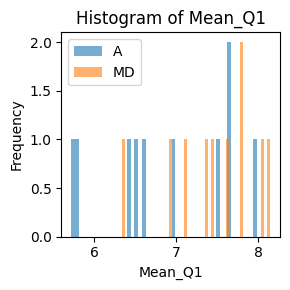

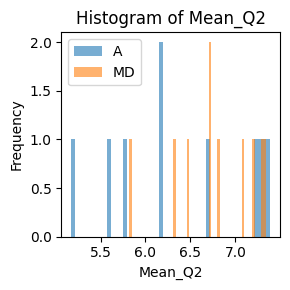

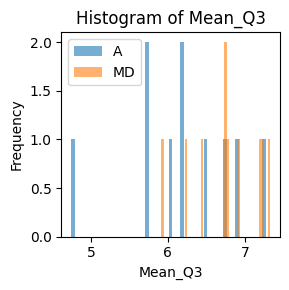

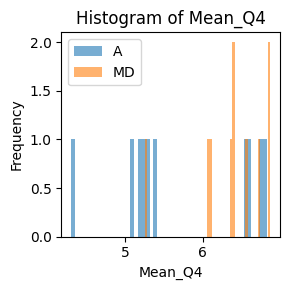

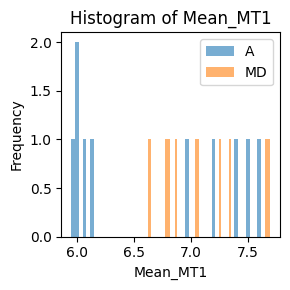

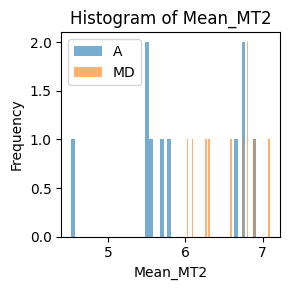

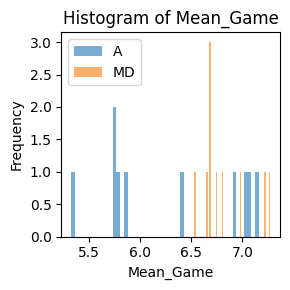

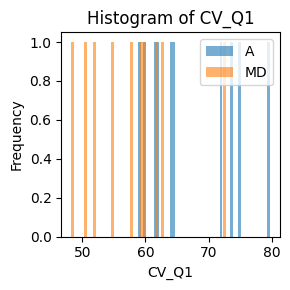

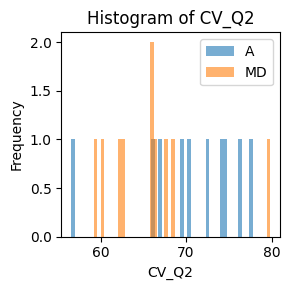

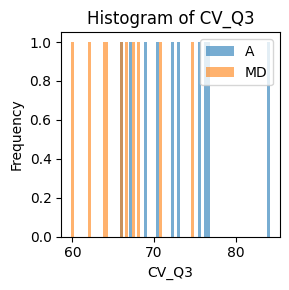

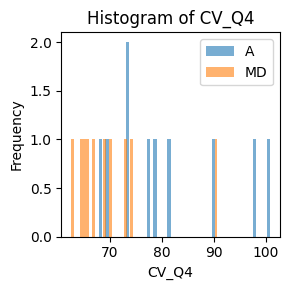

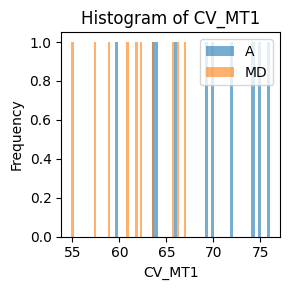

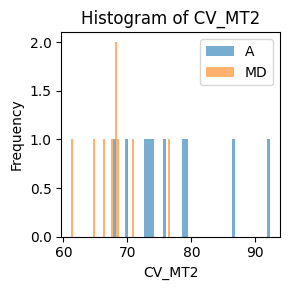

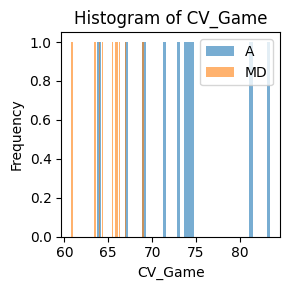

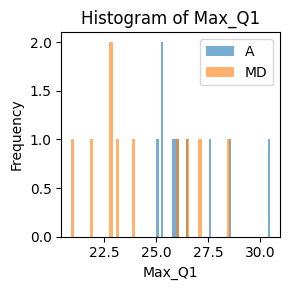

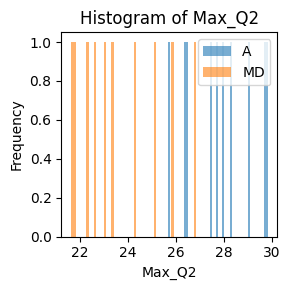

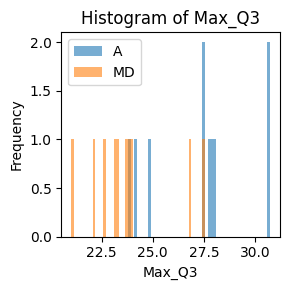

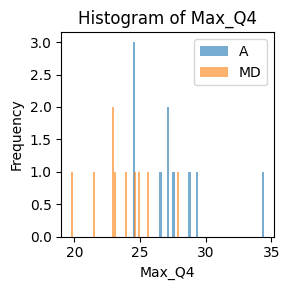

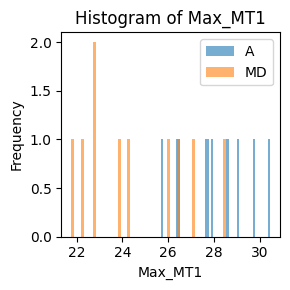

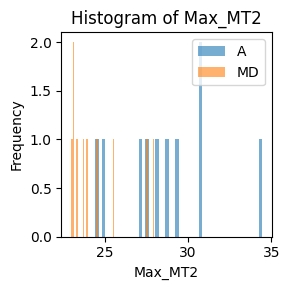

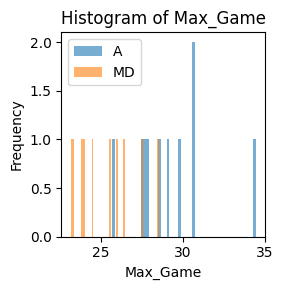

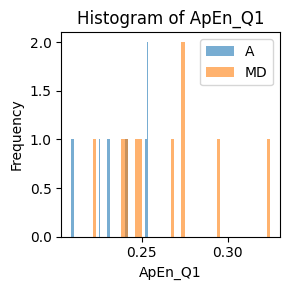

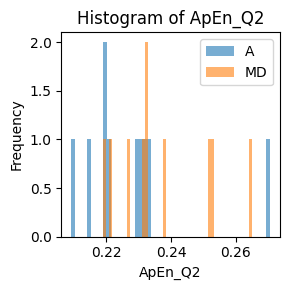

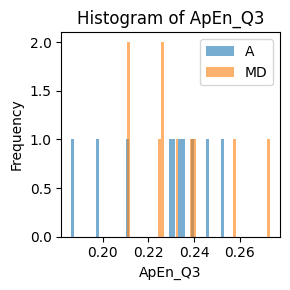

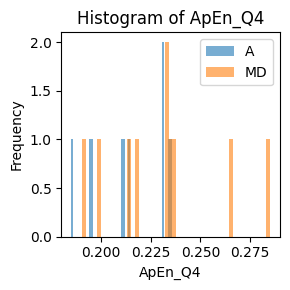

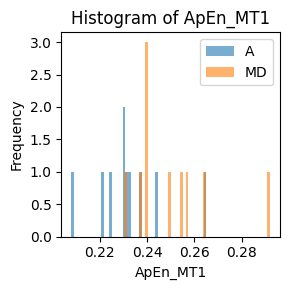

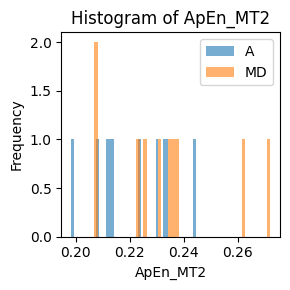

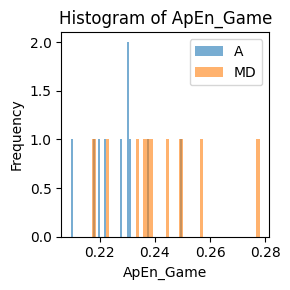

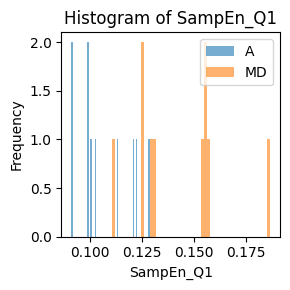

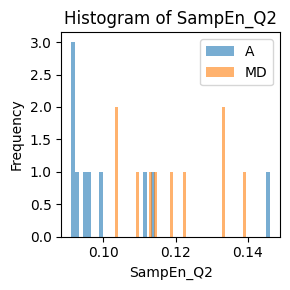

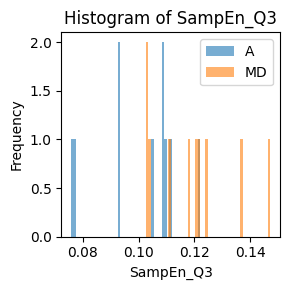

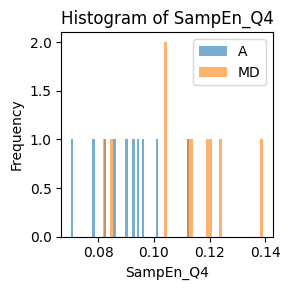

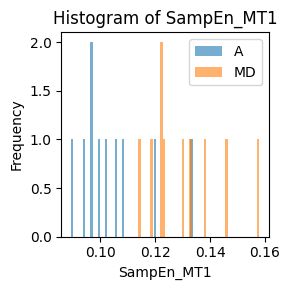

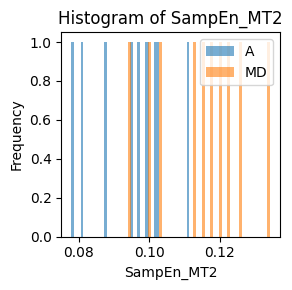

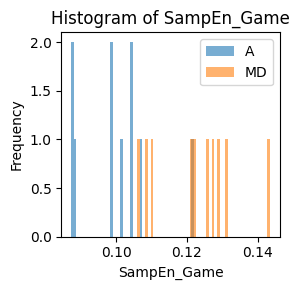

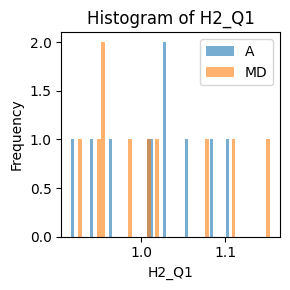

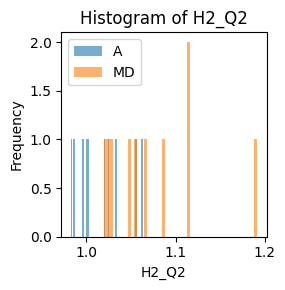

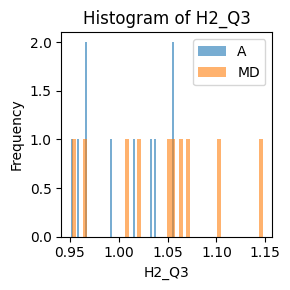

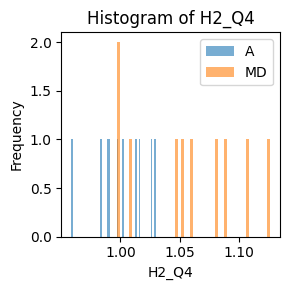

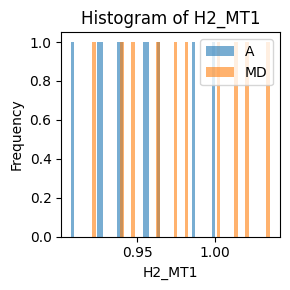

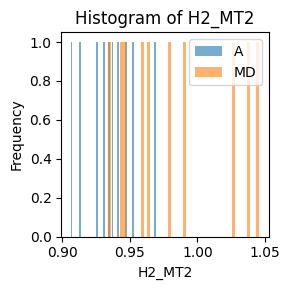

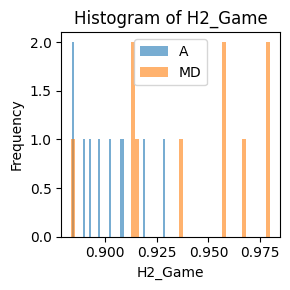

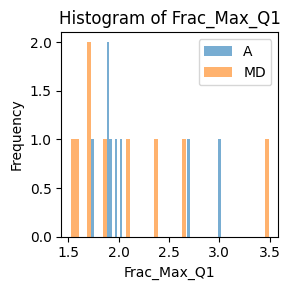

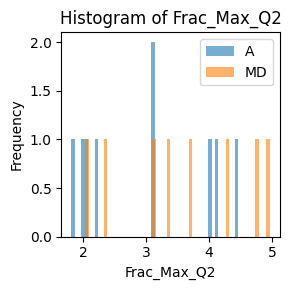

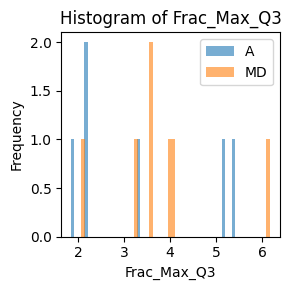

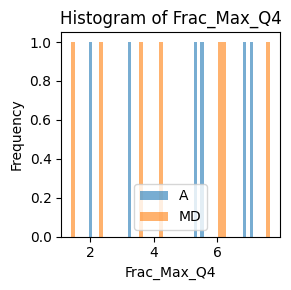

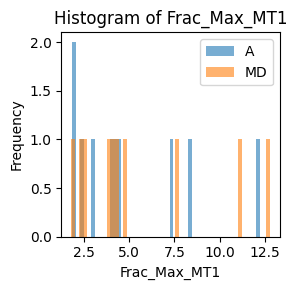

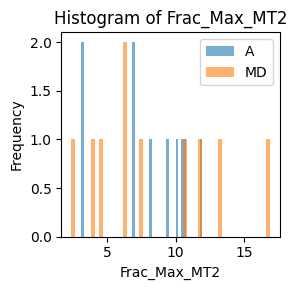

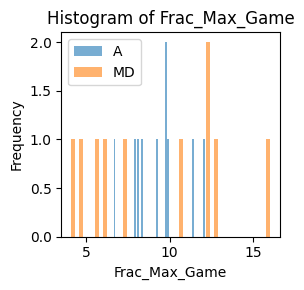

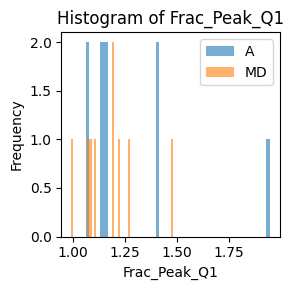

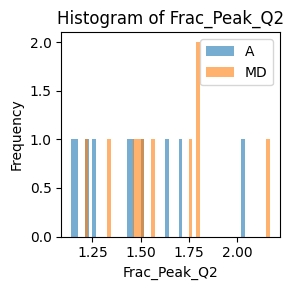

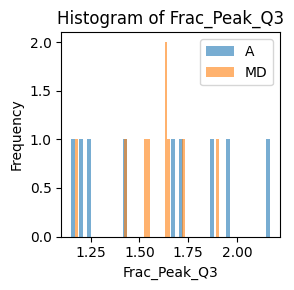

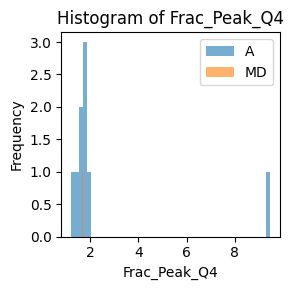

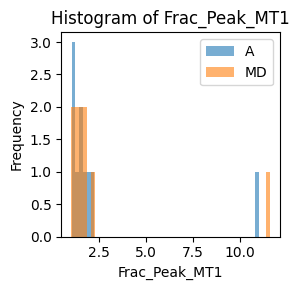

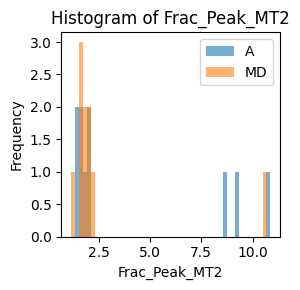

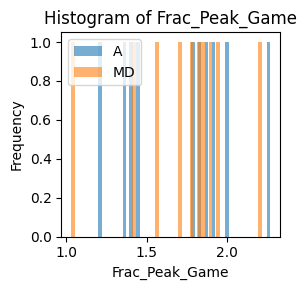

In [7]:
numeric_cols = df.select_dtypes(include="number").columns

for col in numeric_cols:
    group1 = df.loc[df["Position"] == "A", col].dropna()
    group2 = df.loc[df["Position"] == "MD", col].dropna()

    plt.figure(figsize=(3, 3))
    plt.hist(group1, bins=50, alpha=0.6, label="A")
    plt.hist(group2, bins=50, alpha=0.6, label="MD")

    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [27]:
attributes = ["CV_Game", "ApEn_Game", "SampEn_Game", "H2_Game"] 
x = df_updated[attributes]
position = df_updated["Position"]
y = position.astype("category").cat.codes
y

1     0
14    1
34    0
35    0
36    0
37    0
39    0
40    0
41    0
42    0
50    0
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    1
59    1
dtype: int8

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
np.random.seed(42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [41]:
pred = model.predict(X_test)
pred

array([1, 0, 0, 0], dtype=int8)

In [42]:
from sklearn.metrics import accuracy_score, classification_report
np.random.seed(42)
acc = accuracy_score(pred, y_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [43]:
report_dict = classification_report(
    y_test,
    pred,
    output_dict=True
)

df_report = (
    pd.DataFrame(report_dict)
    .transpose()
)


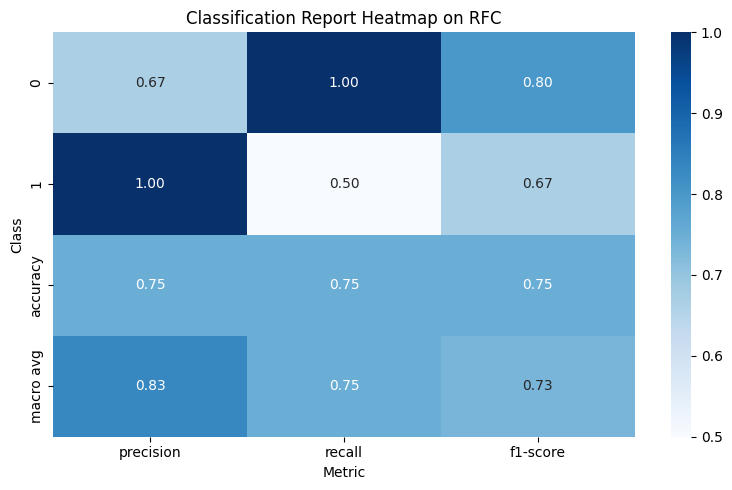

In [60]:
plt.figure(figsize=(8, 5))

sns.heatmap(
    df_report.iloc[:-1, :3], 
    annot=True,
    cmap="Blues",
    fmt=".2f"
)

plt.title("Classification Report Heatmap on RFC")
plt.ylabel("Class")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()

In [47]:
model.score(X_test, y_test)

0.75

In [48]:
all_scores = cross_val_score(model, x, y, cv=8)

In [49]:
np.random.seed(42)
cross_score = np.mean(cross_val_score(model,x,y,cv=8))
cross_score

np.float64(0.9166666666666666)

In [50]:
model.feature_importances_

array([0.35570554, 0.05803793, 0.29000049, 0.29625604])

In [62]:
# USING LOGISTIC REG
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [64]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
np.random.seed(42)
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
model_log.score(X_test, y_test)

0.75

In [53]:
pred_log_train = model_log.predict(X_train)
acc_log = accuracy_score(pred_log_train, y_train) # prediction accuracy on the training data
acc_log

0.8125

In [65]:
pred_log_test = model_log.predict(X_test)
acc_log_test = accuracy_score(pred_log_test, y_test) # prediction accuracy on the test data
acc_log_test

0.75

In [55]:
model_log.score(X_test, y_test)
log_cs= cross_val_score(model_log, x, y, cv=8)
np.random.seed(43)
cross_score_log = np.mean(cross_val_score(model_log,x,y,cv=8))
cross_score_log

np.float64(0.875)

In [66]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_test)
acc_svm = accuracy_score(pred_svm, y_test) # prediction accuracy on the test data
acc_svm

0.25

In [57]:
model_svm.score(X_test, y_test)
svm_cs= cross_val_score(model_svm, x, y, cv=6)
np.random.seed(43)
cross_score_svm = np.mean(cross_val_score(model_svm,x,y,cv=8))
cross_score_svm

np.float64(0.6666666666666666)

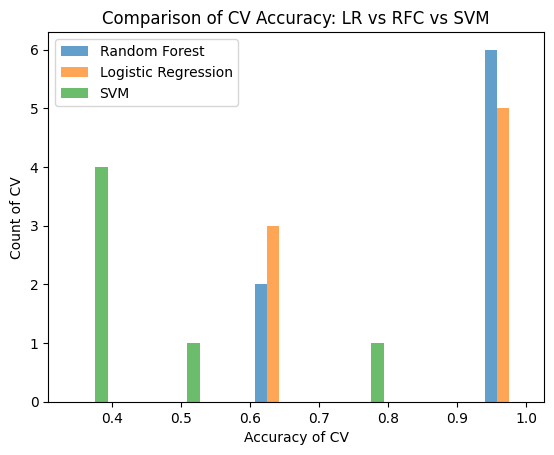

In [67]:
plt.hist(
    [all_scores, log_cs, svm_cs],
    label=["Random Forest", "Logistic Regression", "SVM"],
    bins=10,
    alpha=0.7
)

plt.xlabel("Accuracy of CV")
plt.ylabel("Count of CV")
plt.title("Comparison of CV Accuracy: LR vs RFC vs SVM")
plt.legend()
plt.show()